# DIABETES PREDICTION USING KNN

# Importing Libraries 

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing required libraries from scikit learn package
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve


# Loading Dataset 

In [5]:
dataset = pd.read_csv("C:\\Users\\Darshan\\Desktop\\PBL Project Work\\knn\diabetes.csv")   #defined the folder path of csv file

In [6]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Cleaning the Dataset

In [9]:
# we can replace the null values of the columns by replacing them with mean of the respective column

non_zero = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age" ]
for column in non_zero:
    dataset[column] = dataset[column].replace(0, np.NaN)      #NaN stands for not a number #0 is replace with NaN
    mean= int(dataset[column].mean(skipna=True))     #skipna=True is used to find mean along the column ignoring the NaN values     
    dataset[column] = dataset[column].replace(np.NaN, mean)    #NaN is replace with mean of the respective column

In [10]:
print(dataset.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    155.0  33.6   
1          1.0     85.0           66.0           29.0    155.0  26.6   
2          8.0    183.0           64.0           29.0    155.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          4.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# Exploratory Data Analysis 

In [11]:
dataset.corr()     #To find the pairwise correlation of all columns in the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.153070,0.255967,0.126082,0.066832,0.100746,-0.009198,0.522303,0.248172
Glucose,0.153070,1.000000,0.218615,0.192677,0.420301,0.231470,0.137100,0.266591,0.492911
BloodPressure,0.255967,0.218615,1.000000,0.191892,0.072041,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.126082,0.192677,0.191892,1.000000,0.158133,0.543275,0.102188,0.126107,0.214873
Insulin,0.066832,0.420301,0.072041,0.158133,1.000000,0.166946,0.099170,0.136050,0.214278
BMI,0.100746,0.231470,0.281132,0.543275,0.166946,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.009198,0.137100,-0.002378,0.102188,0.099170,0.153506,1.000000,0.033561,0.173844
Age,0.522303,0.266591,0.324915,0.126107,0.136050,0.025744,0.033561,1.000000,0.238356
Outcome,0.248172,0.492911,0.165723,0.214873,0.214278,0.312249,0.173844,0.238356,1.000000


<AxesSubplot:>

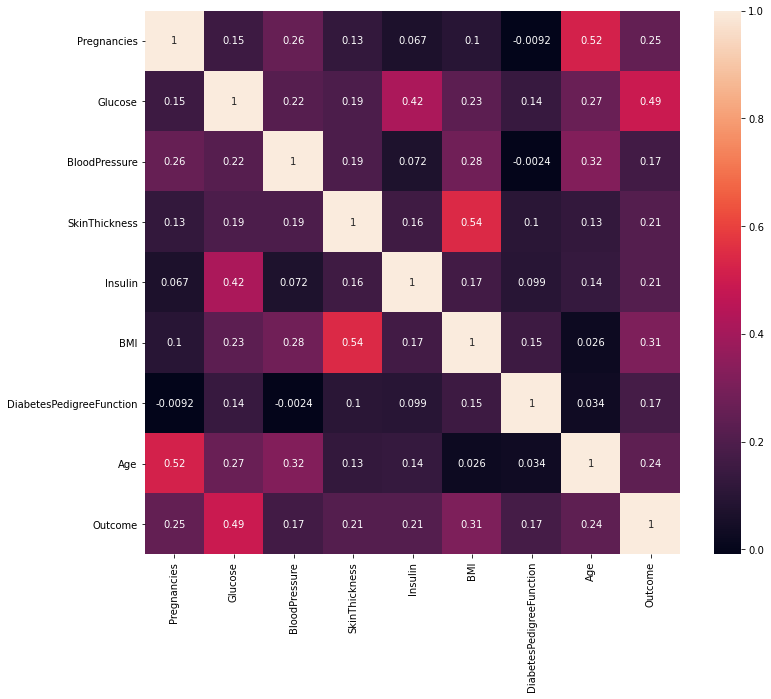

In [15]:
plt.figure(figsize = (12,10))

sns.heatmap(dataset.corr(), annot =True)

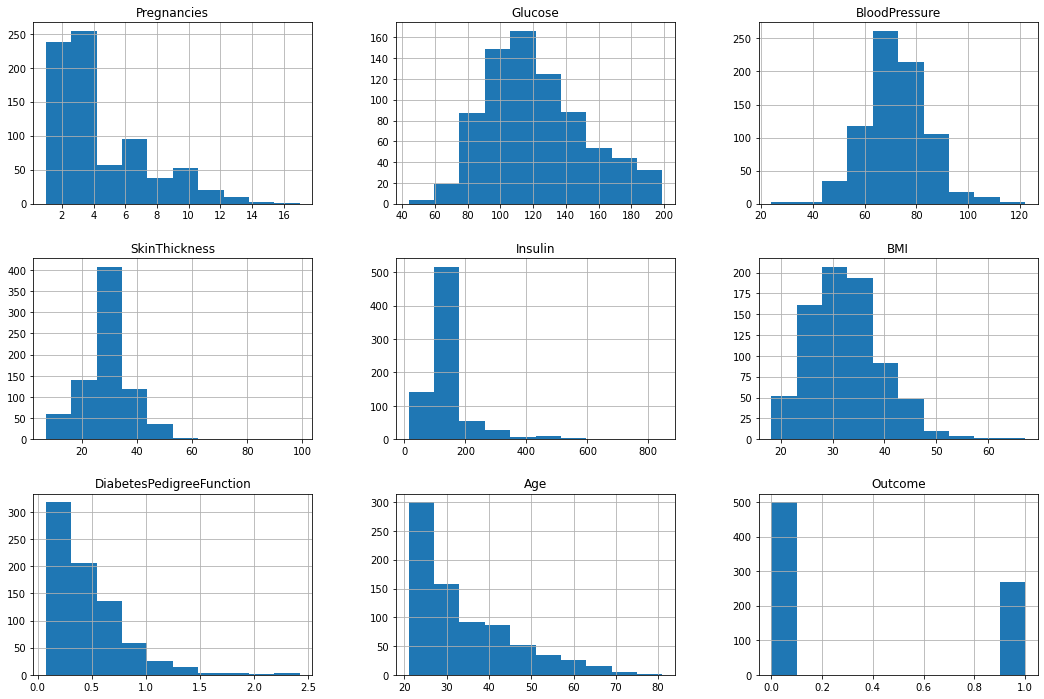

In [16]:
dataset.hist(figsize=(18,12))

plt.show() 

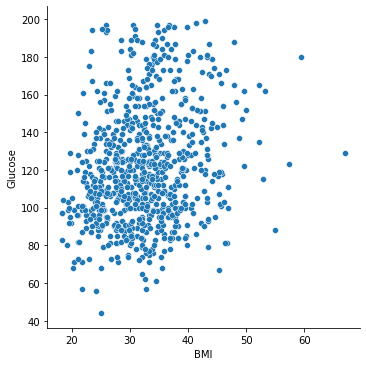

In [17]:
sns.relplot(x='BMI', y='Glucose', data=dataset)

# Spliting the Data 

In [18]:
X= dataset.iloc[:,0:8]                # First 8 column  
Y= dataset.iloc[:,8]                  # last column(9) 
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,random_state=0, test_size=0.2)

# Standard scaler

In [19]:
#Feature Of Standard Scaler                     #To treat the each feature equally we use standard scaler which scales the  
sc_X=StandardScaler()                           # features equally.
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

print(X_train)
print(Y_train)

[[ 0.82926506  0.93641795  0.44764174 ...  0.36863635  0.67740401
   1.69955804]
 [-0.16326661 -0.81630913 -1.05200558 ... -0.63294341 -0.07049698
  -0.96569189]
 [-0.16326661  1.43247278  1.44740662 ...  2.81535261 -0.11855487
  -0.88240283]
 ...
 [-0.16326661 -0.91552009 -0.63543688 ... -1.13373329 -0.95656442
  -1.04898095]
 [ 2.15264062 -1.21315299  0.11438678 ... -0.36108605 -0.50001442
   0.11706589]
 [ 0.16757728  0.47343344  0.7808967  ... -0.08922869  0.52121586
   2.94889395]]
603    1
118    0
247    0
157    0
468    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 614, dtype: int64


# Determining the best value for K

In [22]:
#determining the value of K
import math                  
math.sqrt(len(Y_test))

12.409673645990857

# Fitting the training data to model

In [23]:
knn=KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')

In [24]:
#Fit Model 
knn.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

# Feature Visualisation with each other

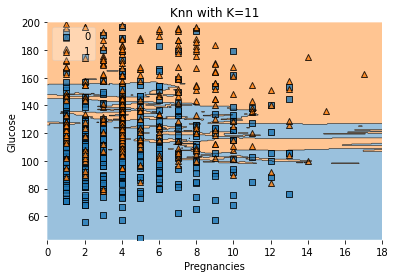

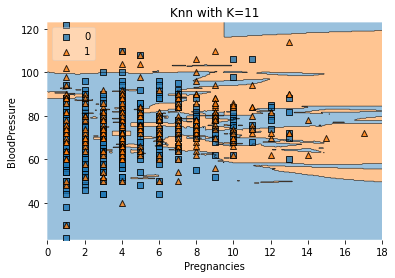

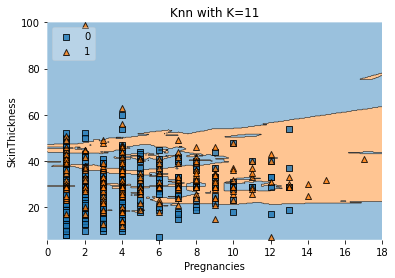

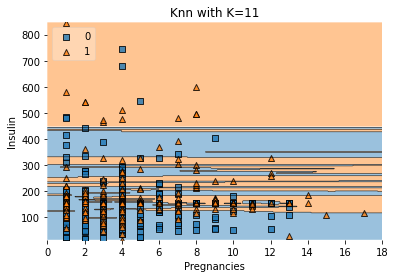

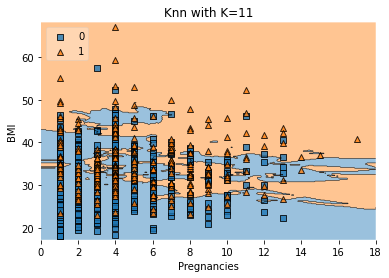

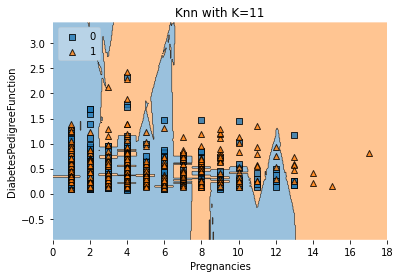

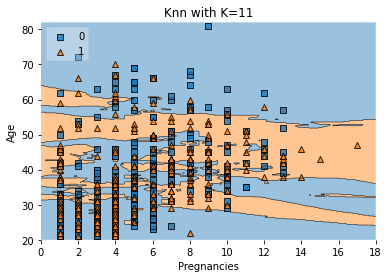

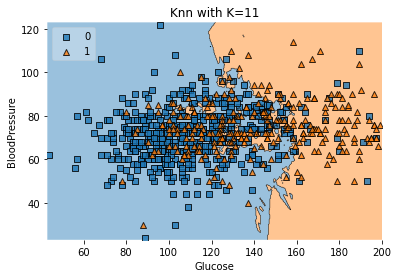

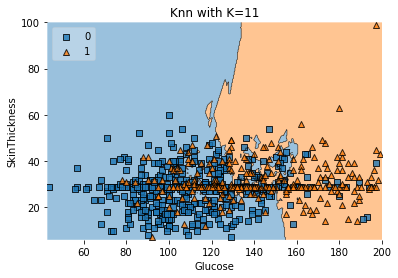

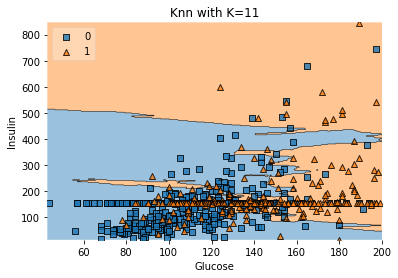

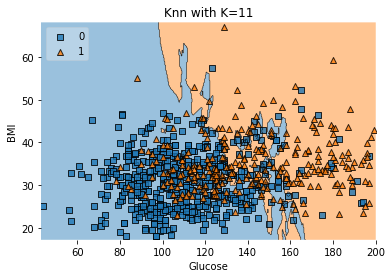

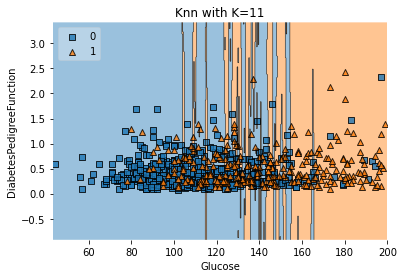

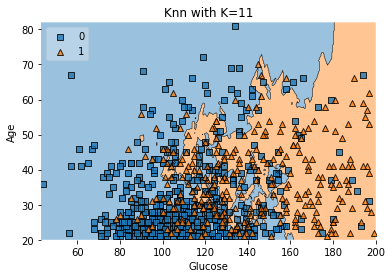

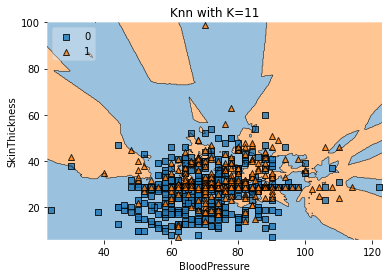

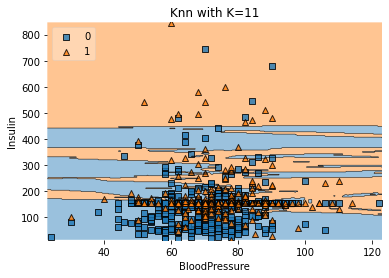

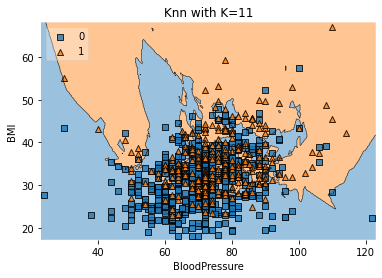

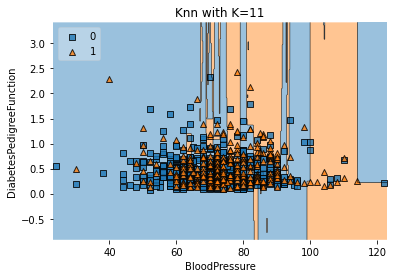

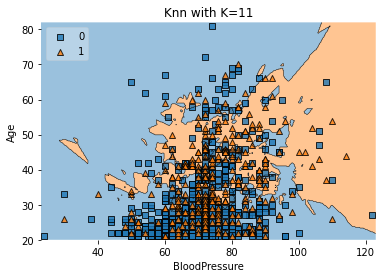

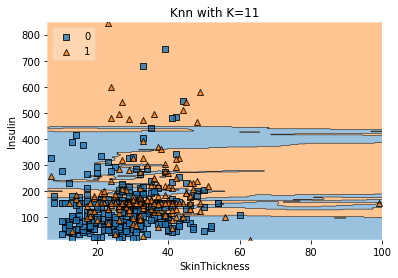

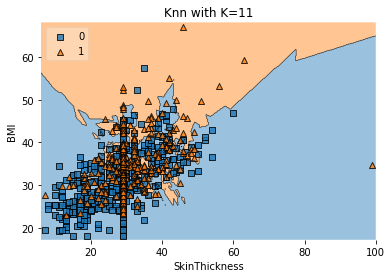

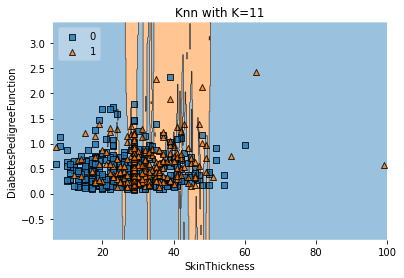

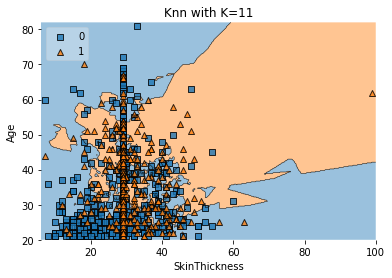

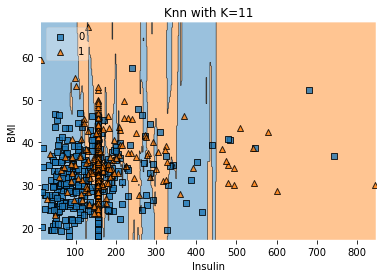

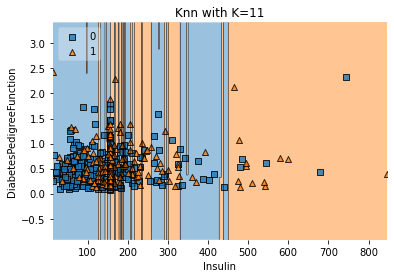

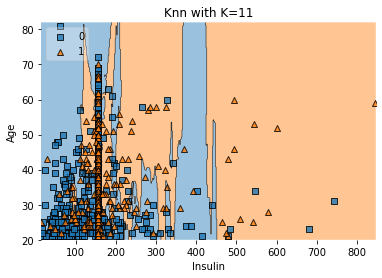

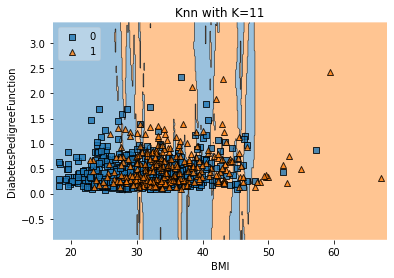

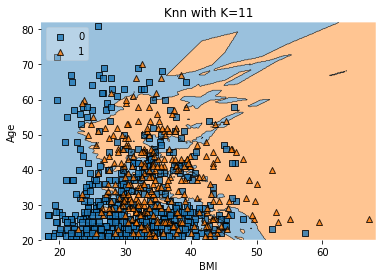

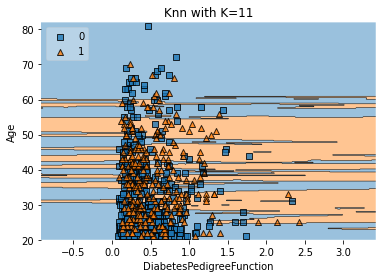

In [31]:
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
def ok(X,Y):
  x = dataset[[X,Y]].values
  y = dataset['Outcome'].astype(int).values
  clf = neighbors.KNeighborsClassifier(n_neighbors=9)
  clf.fit(x, y)
  # Plotting decision region
  plot_decision_regions(x, y, clf=clf, legend=2)
  # Adding axes annotations
  plt.xlabel(X)
  plt.ylabel(Y)
  plt.title('Knn with K='+ str(11))
  plt.show()
tt = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
ll = len(tt)
for i in range(0,ll):
  for j in range(i+1,ll):
    ok(tt[i],tt[j])

# Predicting the Results

In [26]:
#Predicts the results
Y_pred= knn.predict(X_test)
print(Y_pred)


[1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0
 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 1 0 0]


# Accuracy Score

In [154]:
acc=accuracy_score(Y_test, Y_pred)
print("accuracy score: ",acc)

accuracy score:  0.8051948051948052


# Confusion Matrix

[[93 14]
 [16 31]]


<AxesSubplot:>

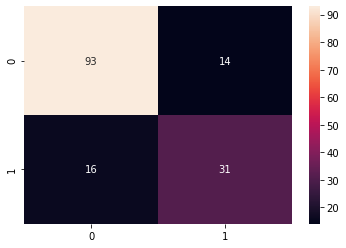

In [35]:
print(confusion_matrix(Y_test,Y_pred))
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True)

# ROC curve 

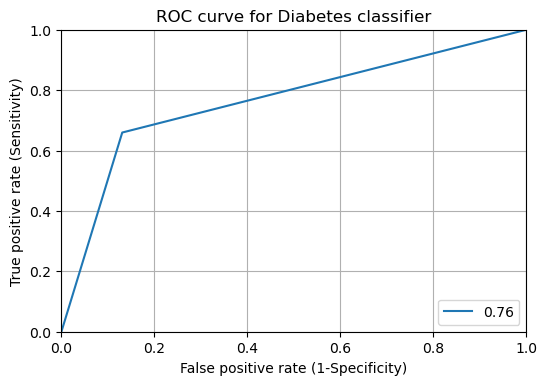

In [46]:
import sklearn
from sklearn.metrics import roc_curve
plt.figure(dpi=100)
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
plt.plot(fpr,tpr,label = "%.2f" %sklearn.metrics.roc_auc_score(Y_test,Y_pred))
plt.legend(loc = 'lower right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Diabetes classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)